In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import feature_extraction as fe
import imp
imp.reload(fe)

C:\Users\USER\AppData\Local\Temp\ipykernel_12720\123357903.py:2: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


<module 'feature_extraction' from 'c:\\Users\\USER\\Documents\\IF5171\\stock-pred-api\\modeling\\feature_engineering\\feature_extraction.py'>

In [3]:
df = yf.download('TLKM.JK', start='2012-09-18', end='2022-09-18')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-09-18,1880.0,1880.0,1850.0,1880.0,1451.125122,72222500
2012-09-19,1880.0,1910.0,1870.0,1880.0,1451.125122,117850000
2012-09-20,1880.0,1880.0,1850.0,1880.0,1451.125122,56595000
2012-09-21,1880.0,1890.0,1860.0,1880.0,1451.125122,56237500
2012-09-24,1850.0,1880.0,1840.0,1850.0,1427.969116,54650000


In [4]:
df.index = pd.to_datetime(df.index)

## Features Extraction

In [5]:
df2 = fe.generate_TAs_features(df)
df2.head()

,Open,High,Low,Close,Adj Close,Volume,7 DAYS MA,RSI 7,MFI 7,7 DAYS STD DEV,14 DAYS MA,RSI 14,MFI 14,21 DAYS MA,RSI 21,MFI 21
Date,,,,,,,,,,,,,,,,
2012-10-17,1950.0,1970.0,1940.0,1930.0,1505.156616,133372500,1940.000000,61.244408,73.228646,17.320508,1919.285714,60.680000,74.111593,1901.904762,61.290323,70.085947
2012-10-18,1930.0,1960.0,1920.0,1930.0,1489.718872,64702500,1940.000000,51.610871,54.408963,17.320508,1922.142857,55.257616,65.564526,1904.285714,57.401813,63.651946
2012-10-19,1930.0,1960.0,1930.0,1910.0,1489.718872,71067500,1940.000000,51.610871,62.180986,17.320508,1925.714286,55.257616,72.405609,1906.666667,57.401813,68.484889
2012-10-22,1910.0,1940.0,1910.0,1930.0,1474.281616,62315000,1934.285714,42.509637,43.306192,19.880596,1926.428571,50.068659,64.820876,1908.095238,53.649205,63.773028
2012-10-23,1930.0,1940.0,1890.0,1960.0,1489.718872,88507500,1934.285714,52.319196,43.306192,19.880596,1928.571429,54.654383,61.549478,1911.904762,56.626496,66.534319


In [6]:
df3 = fe.generate_date_related_features(df2)
df3.head()

,Open,High,Low,Close,Adj Close,Volume,7 DAYS MA,RSI 7,MFI 7,7 DAYS STD DEV,...,21 DAYS MA,RSI 21,MFI 21,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,,,,,,,,,,,,,,
2012-10-17,1950.0,1970.0,1940.0,1930.0,1505.156616,133372500,1940.000000,61.244408,73.228646,17.320508,...,1901.904762,61.290323,70.085947,2,4,10,2012,291,17,42
2012-10-18,1930.0,1960.0,1920.0,1930.0,1489.718872,64702500,1940.000000,51.610871,54.408963,17.320508,...,1904.285714,57.401813,63.651946,3,4,10,2012,292,18,42
2012-10-19,1930.0,1960.0,1930.0,1910.0,1489.718872,71067500,1940.000000,51.610871,62.180986,17.320508,...,1906.666667,57.401813,68.484889,4,4,10,2012,293,19,42
2012-10-22,1910.0,1940.0,1910.0,1930.0,1474.281616,62315000,1934.285714,42.509637,43.306192,19.880596,...,1908.095238,53.649205,63.773028,0,4,10,2012,296,22,43
2012-10-23,1930.0,1940.0,1890.0,1960.0,1489.718872,88507500,1934.285714,52.319196,43.306192,19.880596,...,1911.904762,56.626496,66.534319,1,4,10,2012,297,23,43


In [7]:
df4 = df3.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
df4.head()

,Close,7 DAYS MA,RSI 7,MFI 7,7 DAYS STD DEV,14 DAYS MA,RSI 14,MFI 14,21 DAYS MA,RSI 21,MFI 21,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,,,,,,,,,,,
2012-10-17,1930.0,1940.000000,61.244408,73.228646,17.320508,1919.285714,60.680000,74.111593,1901.904762,61.290323,70.085947,2,4,10,2012,291,17,42
2012-10-18,1930.0,1940.000000,51.610871,54.408963,17.320508,1922.142857,55.257616,65.564526,1904.285714,57.401813,63.651946,3,4,10,2012,292,18,42
2012-10-19,1910.0,1940.000000,51.610871,62.180986,17.320508,1925.714286,55.257616,72.405609,1906.666667,57.401813,68.484889,4,4,10,2012,293,19,42
2012-10-22,1930.0,1934.285714,42.509637,43.306192,19.880596,1926.428571,50.068659,64.820876,1908.095238,53.649205,63.773028,0,4,10,2012,296,22,43
2012-10-23,1960.0,1934.285714,52.319196,43.306192,19.880596,1928.571429,54.654383,61.549478,1911.904762,56.626496,66.534319,1,4,10,2012,297,23,43


In [8]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2459 entries, 2012-10-17 to 2022-09-16
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Close           2458 non-null   float64
 1   7 DAYS MA       2459 non-null   float64
 2   RSI 7           2459 non-null   float64
 3   MFI 7           2459 non-null   float64
 4   7 DAYS STD DEV  2459 non-null   float64
 5   14 DAYS MA      2459 non-null   float64
 6   RSI 14          2459 non-null   float64
 7   MFI 14          2459 non-null   float64
 8   21 DAYS MA      2459 non-null   float64
 9   RSI 21          2459 non-null   float64
 10  MFI 21          2459 non-null   float64
 11  dayofweek       2459 non-null   int64  
 12  quarter         2459 non-null   int64  
 13  month           2459 non-null   int64  
 14  year            2459 non-null   int64  
 15  dayofyear       2459 non-null   int64  
 16  dayofmonth      2459 non-null   int64  
 17  weekofyear     

In [9]:
df4['Close_'] = df4['Close']
df4 = df4.drop(['Close'], axis=1)
df4.head()

,7 DAYS MA,RSI 7,MFI 7,7 DAYS STD DEV,14 DAYS MA,RSI 14,MFI 14,21 DAYS MA,RSI 21,MFI 21,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Close_
Date,,,,,,,,,,,,,,,,,,
2012-10-17,1940.000000,61.244408,73.228646,17.320508,1919.285714,60.680000,74.111593,1901.904762,61.290323,70.085947,2,4,10,2012,291,17,42,1930.0
2012-10-18,1940.000000,51.610871,54.408963,17.320508,1922.142857,55.257616,65.564526,1904.285714,57.401813,63.651946,3,4,10,2012,292,18,42,1930.0
2012-10-19,1940.000000,51.610871,62.180986,17.320508,1925.714286,55.257616,72.405609,1906.666667,57.401813,68.484889,4,4,10,2012,293,19,42,1910.0
2012-10-22,1934.285714,42.509637,43.306192,19.880596,1926.428571,50.068659,64.820876,1908.095238,53.649205,63.773028,0,4,10,2012,296,22,43,1930.0
2012-10-23,1934.285714,52.319196,43.306192,19.880596,1928.571429,54.654383,61.549478,1911.904762,56.626496,66.534319,1,4,10,2012,297,23,43,1960.0


In [10]:
df4 = df4.rename(columns={'Close_': 'Close'})
df4.head()

,7 DAYS MA,RSI 7,MFI 7,7 DAYS STD DEV,14 DAYS MA,RSI 14,MFI 14,21 DAYS MA,RSI 21,MFI 21,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Close
Date,,,,,,,,,,,,,,,,,,
2012-10-17,1940.000000,61.244408,73.228646,17.320508,1919.285714,60.680000,74.111593,1901.904762,61.290323,70.085947,2,4,10,2012,291,17,42,1930.0
2012-10-18,1940.000000,51.610871,54.408963,17.320508,1922.142857,55.257616,65.564526,1904.285714,57.401813,63.651946,3,4,10,2012,292,18,42,1930.0
2012-10-19,1940.000000,51.610871,62.180986,17.320508,1925.714286,55.257616,72.405609,1906.666667,57.401813,68.484889,4,4,10,2012,293,19,42,1910.0
2012-10-22,1934.285714,42.509637,43.306192,19.880596,1926.428571,50.068659,64.820876,1908.095238,53.649205,63.773028,0,4,10,2012,296,22,43,1930.0
2012-10-23,1934.285714,52.319196,43.306192,19.880596,1928.571429,54.654383,61.549478,1911.904762,56.626496,66.534319,1,4,10,2012,297,23,43,1960.0


## Visualizations

C:\Users\USER\AppData\Local\Temp\ipykernel_12720\1562528874.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df4['Close'])


<AxesSubplot: xlabel='Close', ylabel='Density'>

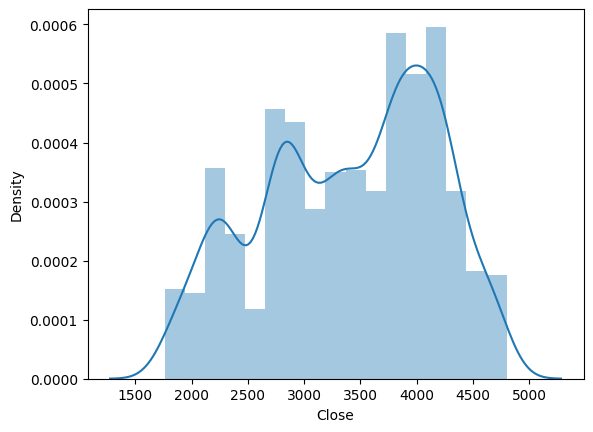

In [11]:
sns.distplot(df4['Close'])

## Standardize Data using StandardScaler

In [12]:
scaled_df = df4.copy()

In [13]:
from sklearn.preprocessing import StandardScaler

features_scaler = StandardScaler()
features = scaled_df.columns[:-1]
scaled_df[features] = features_scaler.fit_transform(scaled_df[features])

In [14]:
close_scaler = StandardScaler()
scaled_df['Close'] = close_scaler.fit_transform(np.array(scaled_df['Close']).reshape(-1,1))

In [15]:
scaled_df.head()

,7 DAYS MA,RSI 7,MFI 7,7 DAYS STD DEV,14 DAYS MA,RSI 14,MFI 14,21 DAYS MA,RSI 21,MFI 21,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Close
Date,,,,,,,,,,,,,,,,,,
2012-10-17,-1.897690,0.683641,1.023638,-1.126356,-1.922242,0.956443,1.496048,-1.941840,1.268434,1.474483,0.008923,1.34241,1.016593,-1.845348,1.033444,0.147246,1.030312,-1.912599
2012-10-18,-1.897690,0.002534,0.097491,-1.126356,-1.918513,0.390498,0.901053,-1.938729,0.764540,0.930980,0.716706,1.34241,1.016593,-1.845348,1.042927,0.261864,1.030312,-1.912599
2012-10-19,-1.897690,0.002534,0.479965,-1.126356,-1.913851,0.390498,1.377288,-1.935619,0.764540,1.339236,1.424489,1.34241,1.016593,-1.845348,1.052410,0.376483,1.030312,-1.938629
2012-10-22,-1.905138,-0.640938,-0.448894,-1.050043,-1.912919,-0.151083,0.849284,-1.933753,0.278258,0.941209,-1.406643,1.34241,1.016593,-1.845348,1.080859,0.720337,1.096678,-1.912599
2012-10-23,-1.905138,0.052614,-0.448894,-1.050043,-1.910122,0.327538,0.621549,-1.928776,0.664071,1.174465,-0.698860,1.34241,1.016593,-1.845348,1.090342,0.834955,1.096678,-1.873553


### Save the scalers

In [16]:
from joblib import dump, load

In [17]:
dump(features_scaler, 'tlkm_features_scaler.bin', compress=True)

['tlkm_features_scaler.bin']

In [18]:
dump(close_scaler, 'tlkm_close_scaler.bin', compress=True)

['tlkm_close_scaler.bin']

In [19]:
test_loaded_sc = load('tlkm_close_scaler.bin')

In [20]:
test_loaded_sc.inverse_transform(np.array(scaled_df['Close']).reshape(-1,1))[0]

array([1930.])

### Save the scaled data as csv

In [21]:
scaled_df.to_csv('../cleaned_data/TLKM.csv')

## EDA

In [22]:
import seaborn as sns
# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

In [23]:
# Correlation Coefficient
def plot_corr_coef(corr_data):
    mask = np.array(corr_data)
    mask[np.tril_indices_from(mask)] = False

    # create appropriate canvas
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111)

    sns.heatmap(corr_data, mask=mask, vmax=.8, square=True, annot=True, ax = ax)

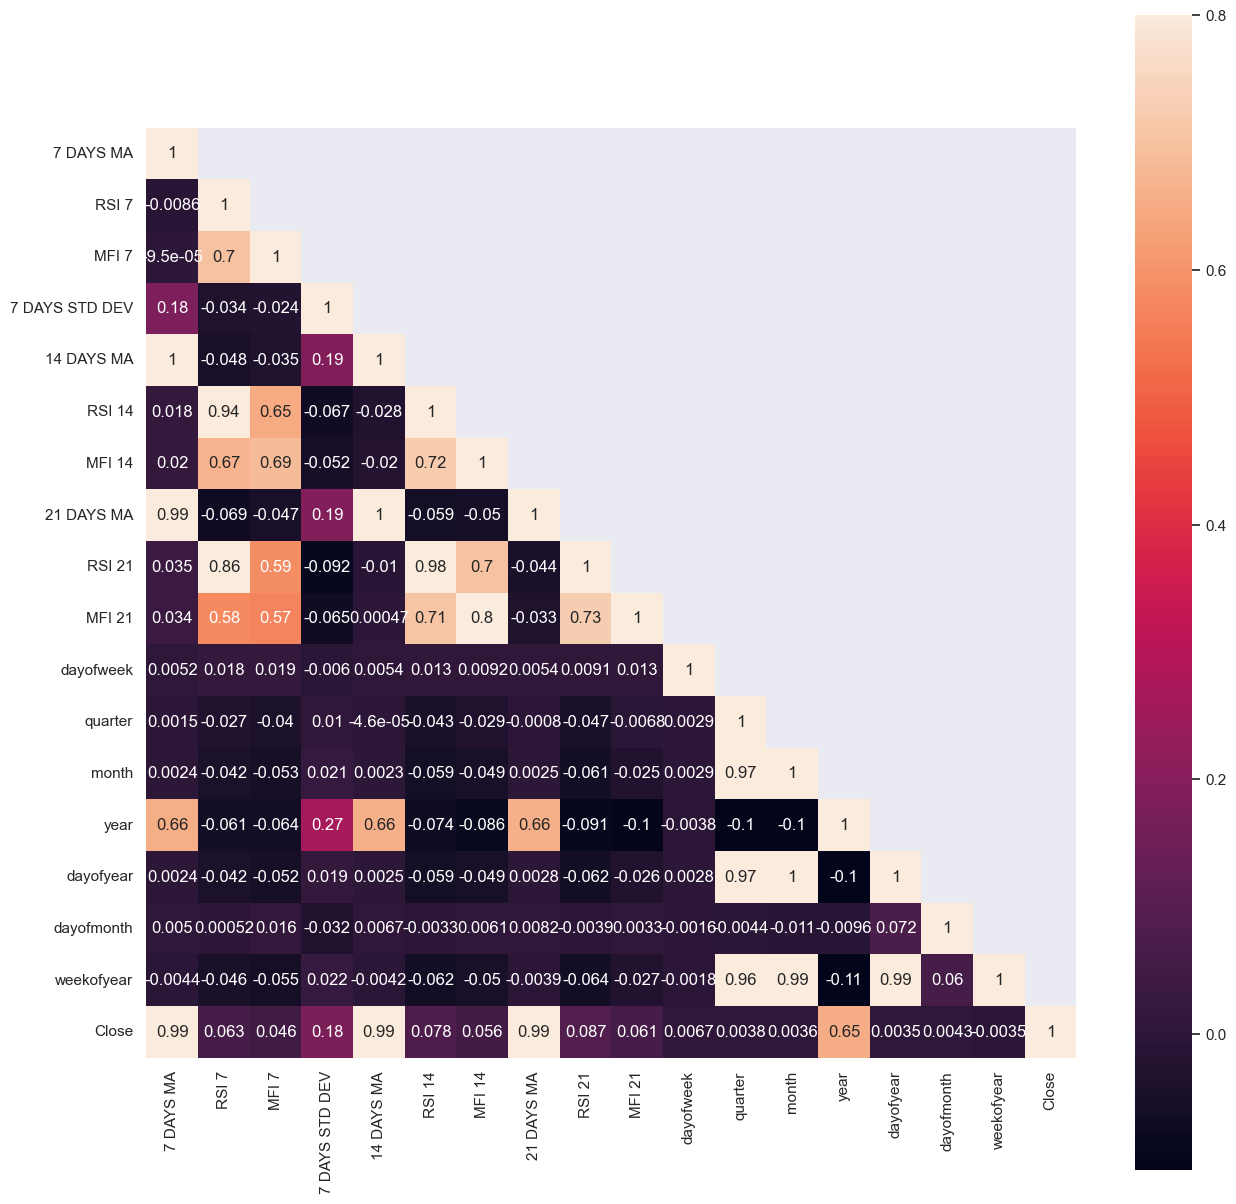

In [24]:
corr_data = scaled_df.corr()
plot_corr_coef(corr_data)

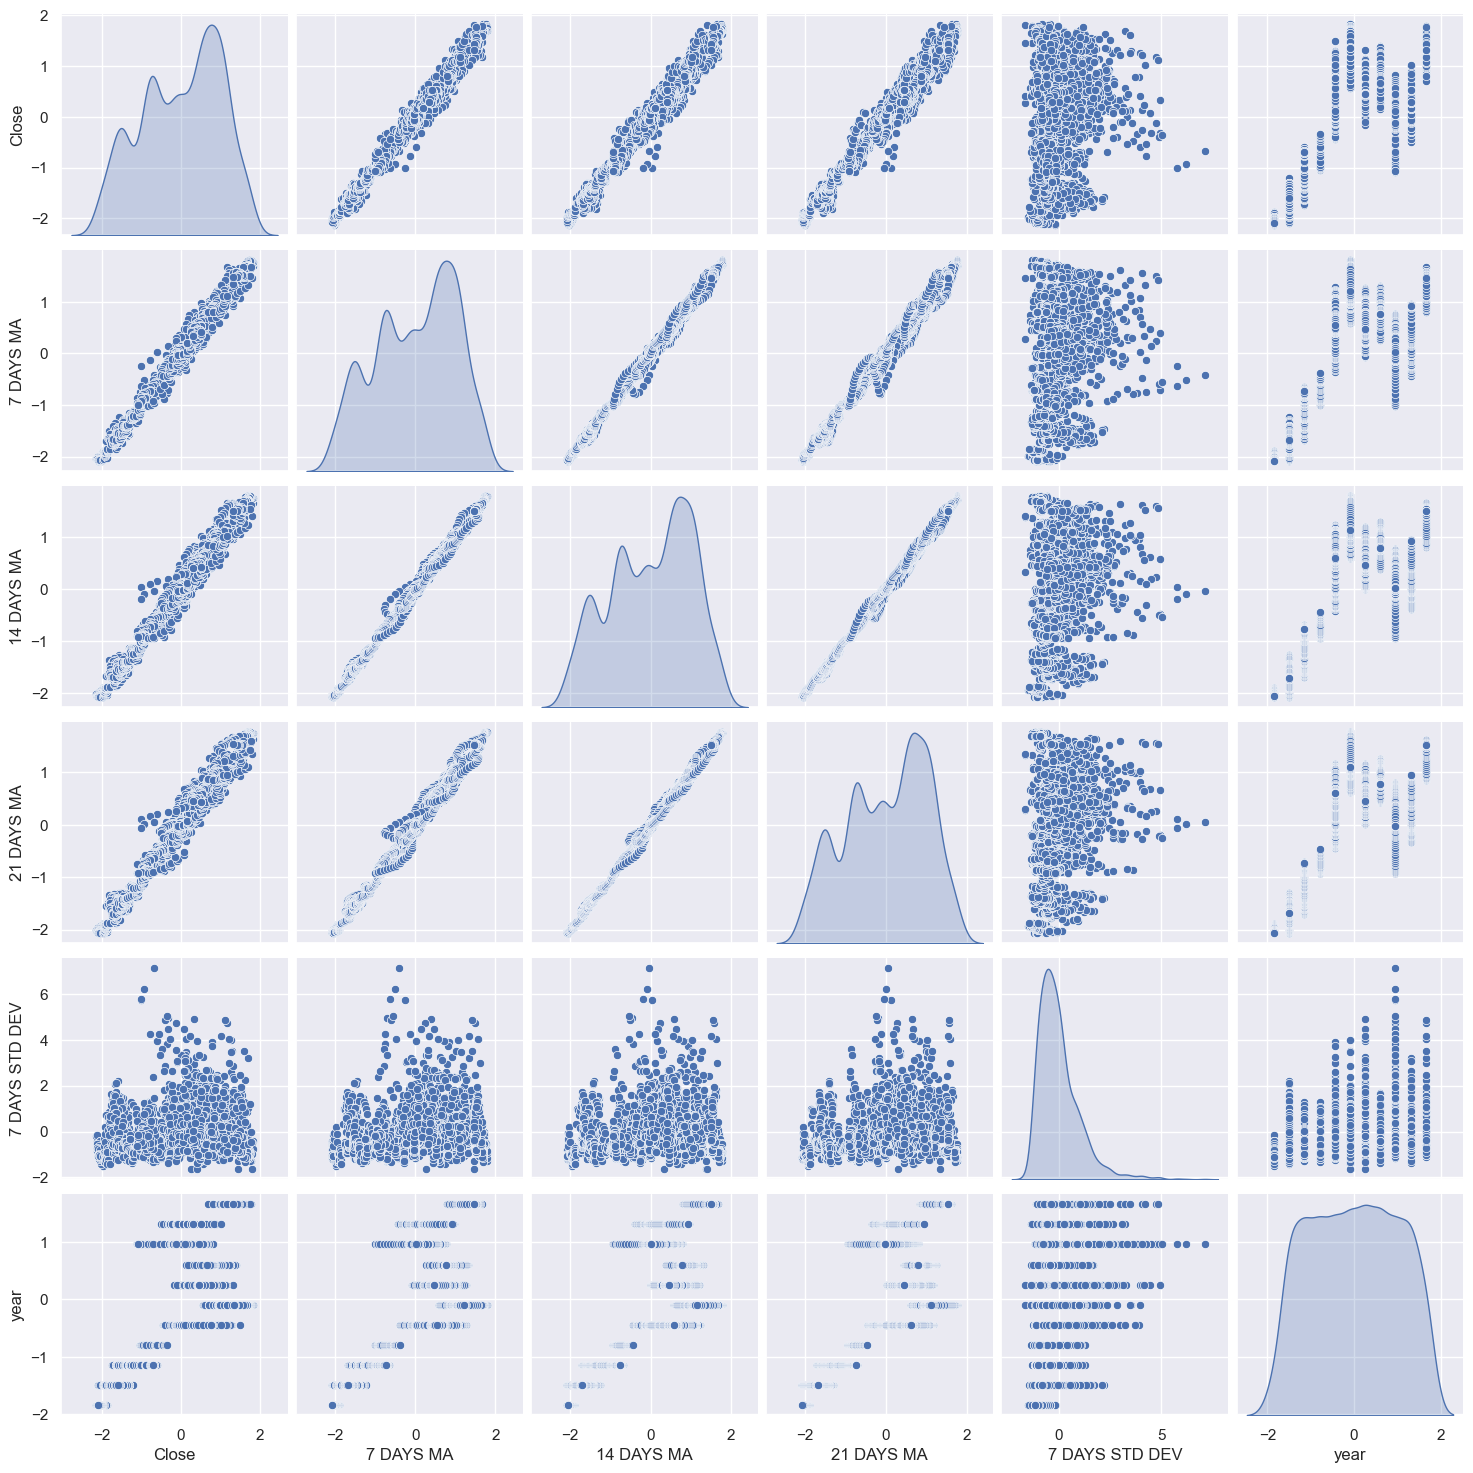

In [25]:
sns.pairplot(scaled_df[['Close', '7 DAYS MA', '14 DAYS MA', '21 DAYS MA', '7 DAYS STD DEV', 'year']], diag_kind='kde')